# Dataset analysis

In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt  # type: ignore


### Base data:

In [ ]:
pd.read_sql_query("""
SELECT Sentence.sentence_ID, sentence, term, wiki_num, max(confidence)
FROM Sentence 
JOIN Sentence_Wikification 
ON Sentence.sentence_ID = Sentence_Wikification.sentence_ID
GROUP BY Sentence_Wikification.sentence_ID
HAVING max(confidence) > 0.5""", connection)  # + topic , resort

In [ ]:
pd.read_sql_query("""
SELECT *
FROM Press_Briefing
WHERE title LIKE '%quanten%'""", connection).head()

In [ ]:
pd.read_sql_query("""
SELECT *
FROM Sentence 
JOIN Sentence_Wikification 
ON Sentence.sentence_ID = Sentence_Wikification.sentence_ID
WHERE pb_ID = 10
""", connection)

In [ ]:
pd.read_sql_query("""
SELECT sentence
FROM Sentence 
WHERE pb_ID = 10
""", connection)

### Pre labeled data

In [12]:
data = pd.read_csv(os.path.join("data", "SMC_dataset", "pre_labeled", "SMC_claim_setences_pre.csv"), names=["sentence_ID", "title", "sentence", "prob"])
data.head()

<AxesSubplot:title={'center':'Predicted claim probability'}, xlabel='Sentences', ylabel='Predicted claim probability'>

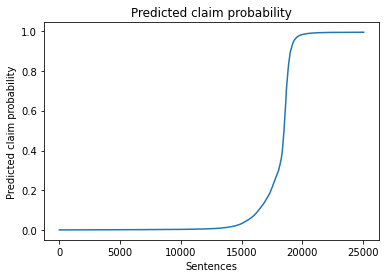

In [47]:
plt.figure(facecolor="white")
data.prob.sort_values().reset_index(drop=True).plot.line(xlabel="Sentences", ylabel="Predicted claim probability", title="Predicted claim probability")

In [53]:
data.prob.quantile([.1, .2, .3, .4,.5,.6,.7,.8,.9])

0.1    0.002265
0.2    0.002811
0.3    0.003383
0.4    0.004409
0.5    0.007969
0.6    0.034142
0.7    0.218444
0.8    0.982467
0.9    0.992475
Name: prob, dtype: float64